#Decision Trees and Ensembles
###March 9, 2015

##Manual Decision Tree Creation

Playing with a tiny data set to work through splitting data manually.  Party time!

It's a used car dataset.

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT4/master/data/used_vehicles.csv'
used_cars_csv = pd.read_csv(url)

In [2]:
used_cars_csv.describe()

,price,year,miles,doors
count,14.000000,14.000000,14.000000,14.000000
mean,6571.428571,2004.857143,114464.285714,3.142857
std,6161.097376,4.382784,63198.242516,1.027105
min,1300.000000,1997.000000,13000.000000,2.000000
25%,2125.000000,2003.000000,64875.000000,2.000000
50%,3500.000000,2004.000000,131000.000000,4.000000
75%,9375.000000,2008.500000,162250.000000,4.000000
max,22000.000000,2012.000000,209000.000000,4.000000


In [3]:
used_cars_csv.head()

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


In [6]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a78df10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109c88bd0>]], dtype=object)

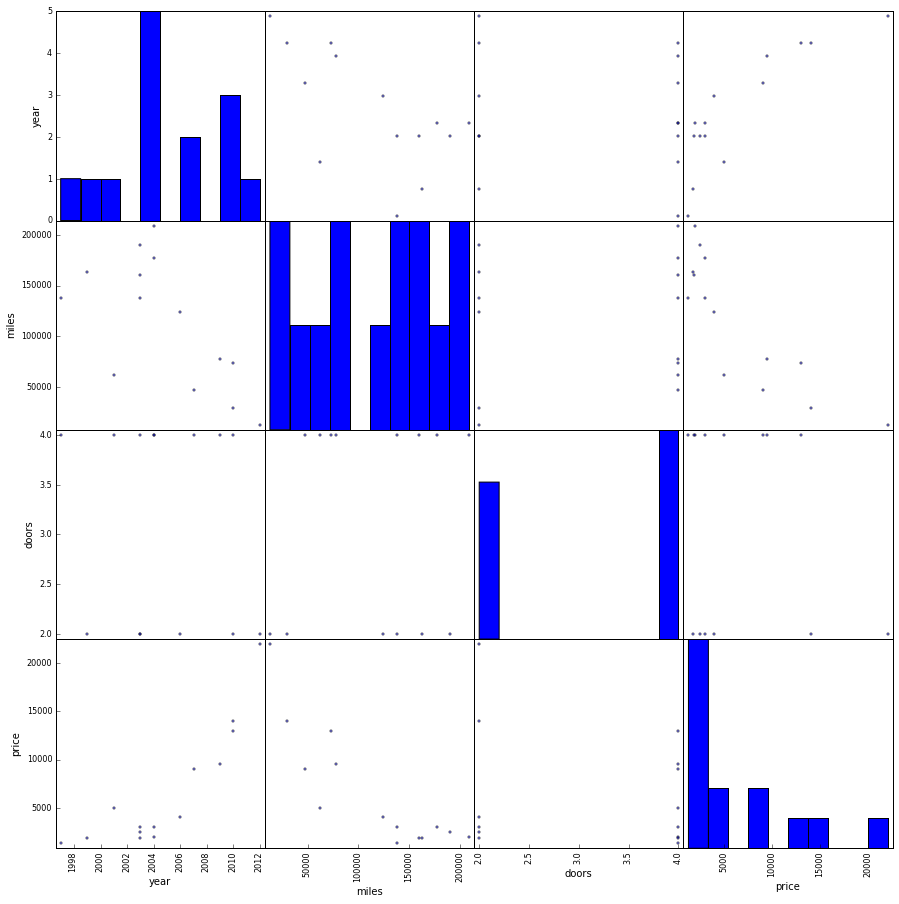

In [7]:
cols = ['year', 'miles', 'doors', 'type', 'price',]
pd.scatter_matrix(used_cars_csv[cols], figsize=(15, 15))

In [8]:
used_cars_csv.doors.unique()

array([2, 4])

In [18]:
cols = ['year', 'miles', 'doors', 'type', 'price',]
for col in cols:
    print used_cars_csv[col].unique(), col
    print "-"*40
    print

[2012 2010 2009 2007 2006 2004 2003 2001 1999 1997] year
----------------------------------------

[ 13000  30000  73500  78000  47000 124000 177000 209000 138000 160000
 190000  62000 163000] miles
----------------------------------------

[2 4] doors
----------------------------------------

['car' 'truck'] type
----------------------------------------

[22000 14000 13000  9500  9000  4000  3000  2000  1900  2500  5000  1800
  1300] price
----------------------------------------



In [21]:
type_split = used_cars_csv.groupby('type').price.mean()

In [22]:
print type_split

type
car      7790.909091
truck    2100.000000
Name: price, dtype: float64


In [23]:
doors_split =  used_cars_csv.groupby('doors').price.mean()

In [24]:
print doors_split

doors
2        7883.333333
4        5587.500000
Name: price, dtype: float64


In [29]:
year_split = used_cars_csv.groupby('year').price.mean()
print year_split

year
1997     1300.000000
1999     1800.000000
2001     5000.000000
2003     2466.666667
2004     2500.000000
2006     4000.000000
2007     9000.000000
2009     9500.000000
2010    13500.000000
2012    22000.000000
Name: price, dtype: float64


In [35]:
trucks = used_cars_csv[used_cars_csv.type == 'truck']
cars = used_cars_csv[used_cars_csv.type ==  'car']

In [37]:
cars_doors = cars.groupby('doors').price.mean()
trucks_doors = trucks.groupby('doors').price.mean()

print cars_doors
print trucks_doors

doors
2        10750
4         6100
Name: price, dtype: int64
doors
2        2150
4        2000
Name: price, dtype: int64


In [39]:
truck_year = trucks.groupby('year').price.mean()
print truck_year

year
1999    1800
2003    2500
2004    2000
Name: price, dtype: int64


In [40]:
truck_miles = trucks.groupby('miles').price.mean()
print truck_miles

miles
163000    1800
190000    2500
209000    2000
Name: price, dtype: int64


#Building a Decision Tree with a Computer

Now let's do the same thing in SKLearn

In [42]:
vehicles = used_cars_csv

In [43]:
vehicles['type'] = vehicles.type.map({'car':0, 'truck':1})

In [111]:
# select feature columns (every column except for the 0th column)
feature_cols = vehicles.columns[1:]

# define X (features) and y (response)
X = vehicles[feature_cols]
y = vehicles.price

In [112]:
# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

line = "-"*40

# print out each of the arrays
print X_train
print line
print y_train
print line
print X_test
print line
print y_test

[[  2003 190000      2      1]
 [  2007  47000      4      0]
 [  2010  30000      2      0]
 [  1999 163000      2      1]
 [  2012  13000      2      0]
 [  1997 138000      4      0]
 [  2003 160000      4      0]
 [  2003 138000      2      0]
 [  2001  62000      4      0]
 [  2006 124000      2      0]]
----------------------------------------
[ 2500  9000 14000  1800 22000  1300  1900  3000  5000  4000]
----------------------------------------
[[  2009  78000      4      0]
 [  2004 209000      4      1]
 [  2004 177000      4      0]
 [  2010  73500      4      0]]
----------------------------------------
[ 9500  2000  3000 13000]


In [113]:
# import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(compute_importances=None, criterion='mse',
           max_depth=None, max_features=None, max_leaf_nodes=None,
           min_density=None, min_samples_leaf=1, min_samples_split=2,
           random_state=1, splitter='best')

In [114]:
# make predictions
preds = treereg.predict(X_test)

# print predictions and actual values
print preds
print y_test

[ 5000.  1900.  1900.  5000.]
[ 9500  2000  3000 13000]


In [115]:
# print RMSE
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, preds))

4622.4993239588475

In [116]:
# use cross-validation to find best max_depth
from sklearn.cross_validation import cross_val_score

In [117]:
# try max_depth=2
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

4804.3767888427128

In [118]:
# try max_depth=3
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

4592.1554255755254

In [119]:
# try max_depth=4
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

4704.0052694797387

In [120]:
# max_depth=3 was best, so fit a tree using that parameter with ALL DATA
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(compute_importances=None, criterion='mse', max_depth=3,
           max_features=None, max_leaf_nodes=None, min_density=None,
           min_samples_leaf=1, min_samples_split=2, random_state=1,
           splitter='best')

Best score: 4592.15542558
Best depth: 3


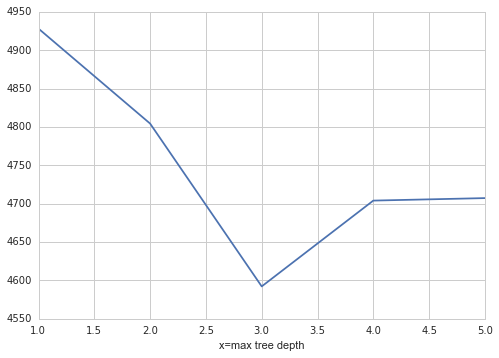

In [121]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 6):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treereg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
treereg.fit(X, y)

plt.figure()
plt.plot(range(1, 6), all_scores)
plt.xlabel('x=max tree depth')

In [122]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,type,0.000000


Best score: 4460.29074243
Best min samples: 5


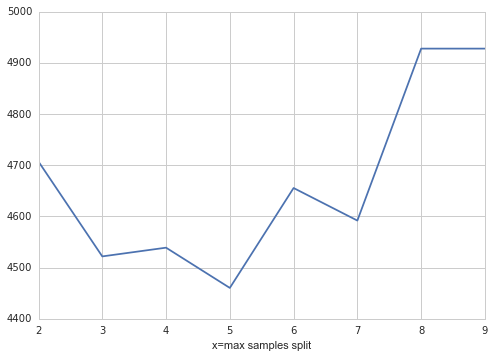

In [123]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

all_scores = []
best_score = -1
best_min_samples = 0
lo = 2
hi = 10

for i in range(lo, hi):
    treereg = DecisionTreeRegressor(min_samples_split=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_min_samples = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best min samples: %s" % best_min_samples

# now actually fit the model
treereg = DecisionTreeRegressor(min_samples_split=best_min_samples, random_state=1)
treereg.fit(X, y)

plt.figure()
plt.plot(range(lo, hi), all_scores)
plt.xlabel('x=max samples split')

In [124]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.791338
1,miles,0.208662
2,doors,0.000000
3,type,0.000000


Best score: 4607.62855534
Best leaf: 3


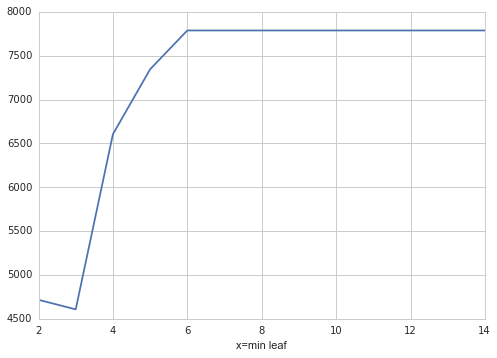

In [127]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

all_scores = []
best_score = -1
best_leaf = 0
lo = 2
hi = 15
for i in range(lo, hi):
    treereg = DecisionTreeRegressor(min_samples_leaf=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_leaf = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best leaf: %s" % best_leaf

# now actually fit the model
treereg = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=1)
treereg.fit(X, y)

plt.figure()
plt.plot(range(lo, hi), all_scores)
plt.xlabel('x=min leaf')

In [128]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.993042
1,miles,0.006958
2,doors,0.000000
3,type,0.000000


#Titantic Data Set

Predicting survival

In [83]:
titanic = pd.read_csv('../../Data/titanic.csv')

In [84]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
# copy
titanic_c = pd.DataFrame(titanic)

# encode sex feature
titanic_c['sex'] = titanic.sex.map({'female':0, 'male':1})
mean_age = round(titanic.age.mean(),0)
# fill in missing values for age
titanic_c.age.fillna(mean_age, inplace=True)

# is there a more intelligent way we might handle age?
#titanic_c.age.fillna(, inplace=True)

# print the updated DataFrame
titanic_c.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C


In [89]:
# create three dummy variables, drop the first dummy variable, and store this as a DataFrame
embarked_dummies = pd.get_dummies(titanic_c.embarked, prefix='embarked').iloc[:, 1:]

# join the two dummy variable columns onto the original DataFrame
titanic_c = titanic_c.join(embarked_dummies)

# print the updated DataFrame
titanic_c.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,embarked_Q,embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,0,1
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0,1
5,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q,1,0
6,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C,0,0


In [90]:
# create a list of feature columns
feature_cols = ['pclass', 'sex', 'age', 'embarked_Q', 'embarked_S']

# define X and y
X = titanic_c[feature_cols]
y = titanic_c.survived

In [91]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1, splitter='best')

In [94]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,pclass,0.242664
1,sex,0.655584
2,age,0.064494
3,embarked_Q,0.000000
4,embarked_S,0.037258


Best score: 0.835346563129
Best depth: 3


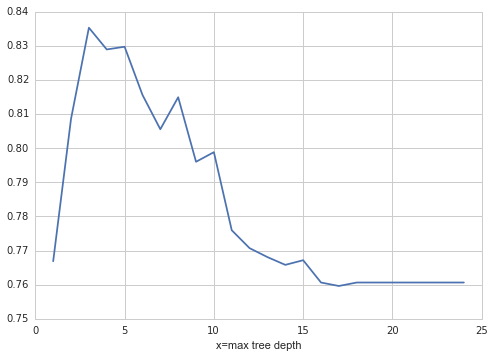

In [106]:
all_scores = []
best_score = 1
best_depth = 0
lo = 1
hi = 25 
for i in range(lo, hi):
    treeclf = DecisionTreeClassifier(max_depth=i, random_state=1)
    score = cross_val_score(treeclf, X, y, cv=3, scoring='roc_auc')
    current_score = np.mean(score)
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score > best_score or best_score == 1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treereg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
treereg.fit(X, y)

plt.figure()
plt.plot(range(lo, hi), all_scores)
plt.xlabel('x=max tree depth')

In [ ]:
all_scores = []
best_score = 1
best_depth = 0
lo = 1
hi = 25 
for i in range(lo, hi):
    treeclf = DecisionTreeClassifier(max_depth=i, random_state=1)
    score = cross_val_score(treeclf, X, y, cv=3, scoring='roc_auc')
    current_score = np.mean(score)
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score > best_score or best_score == 1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treereg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
treereg.fit(X, y)

plt.figure()
plt.plot(range(lo, hi), all_scores)
plt.xlabel('x=max tree depth')